<a href="https://colab.research.google.com/github/btarakaratna/AI-in-Healthcare-Building-a-Life-Saving-Heart-Disease-Predictor/blob/main/AI_in_Healthcare_Building_a_Life_Saving_Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🩺  Heart Disease Prediction

**Objective** : Developing a machine learning model that predicts whether a patient has heart disease using medical attributes. This project introduces classification techniques in machine learning.

**Outcomes from the Project**:

**Understanding classification problems (predicting categories).**

**Performing EDA for classification datasets to uncover class-specific patterns.**

**Applying data preprocessing (encoding categorical variables, scaling features).**

**Building & comparing models**:

-- Logistic Regression (baseline).

-- Random Forest (ensemble).

**🗂 Core Workflow**

-- Understand Classification Fundamentals

-- Perform EDA (class distribution, correlations, patterns)

-- Preprocess Data (encoding + scaling)

-- Build Models (Logistic Regression, Random Forest)

-- Evaluating the Models (metrics + confusion matrix)

-- Analyze Feature Importance


**In this project, our goal is to predict one of two classes for a patient: `0` `(No Heart Disease)` or `1` `(Has Heart Disease)`. This is a binary classification  problem.**

In [ ]:
# 1: Setting Up Importing Libraries and Loading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Set plot style
sns.set_style('whitegrid')

In [ ]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# 2: Performing EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


Text(0.5, 1.0, 'Distribution of Patients without Heart Disease')

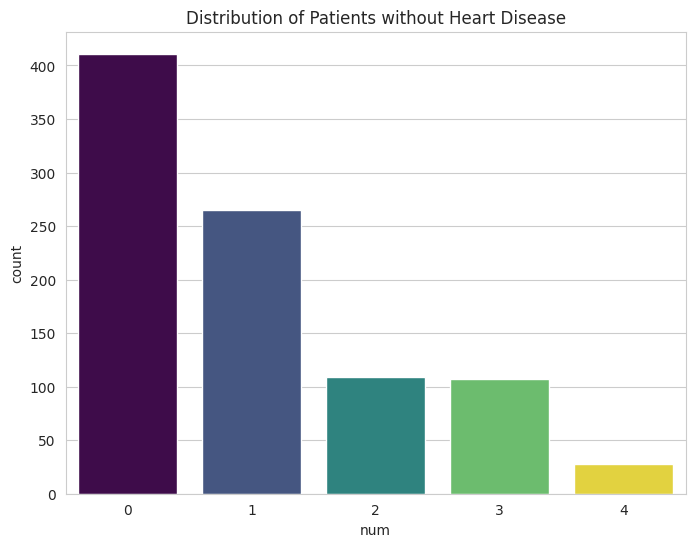

In [ ]:
# 2.1: Analyzing the target variable

#Lets observe the Distribution of patients without the Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df, palette='viridis', hue = 'num', legend = False)
plt.title('Distribution of Patients without Heart Disease')

**Key Insights**:

Most patients without heart disease fall under num = 0 (over 400 cases).

The next highest group is num = 1 (~260 cases).

Very few patients are in higher categories (num = 2, 3, 4), with num = 4 being the rarest (~30 cases).

The distribution is heavily skewed towards lower num values, showing that absence or minimal presence of the measured factor dominates among patients without heart disease.

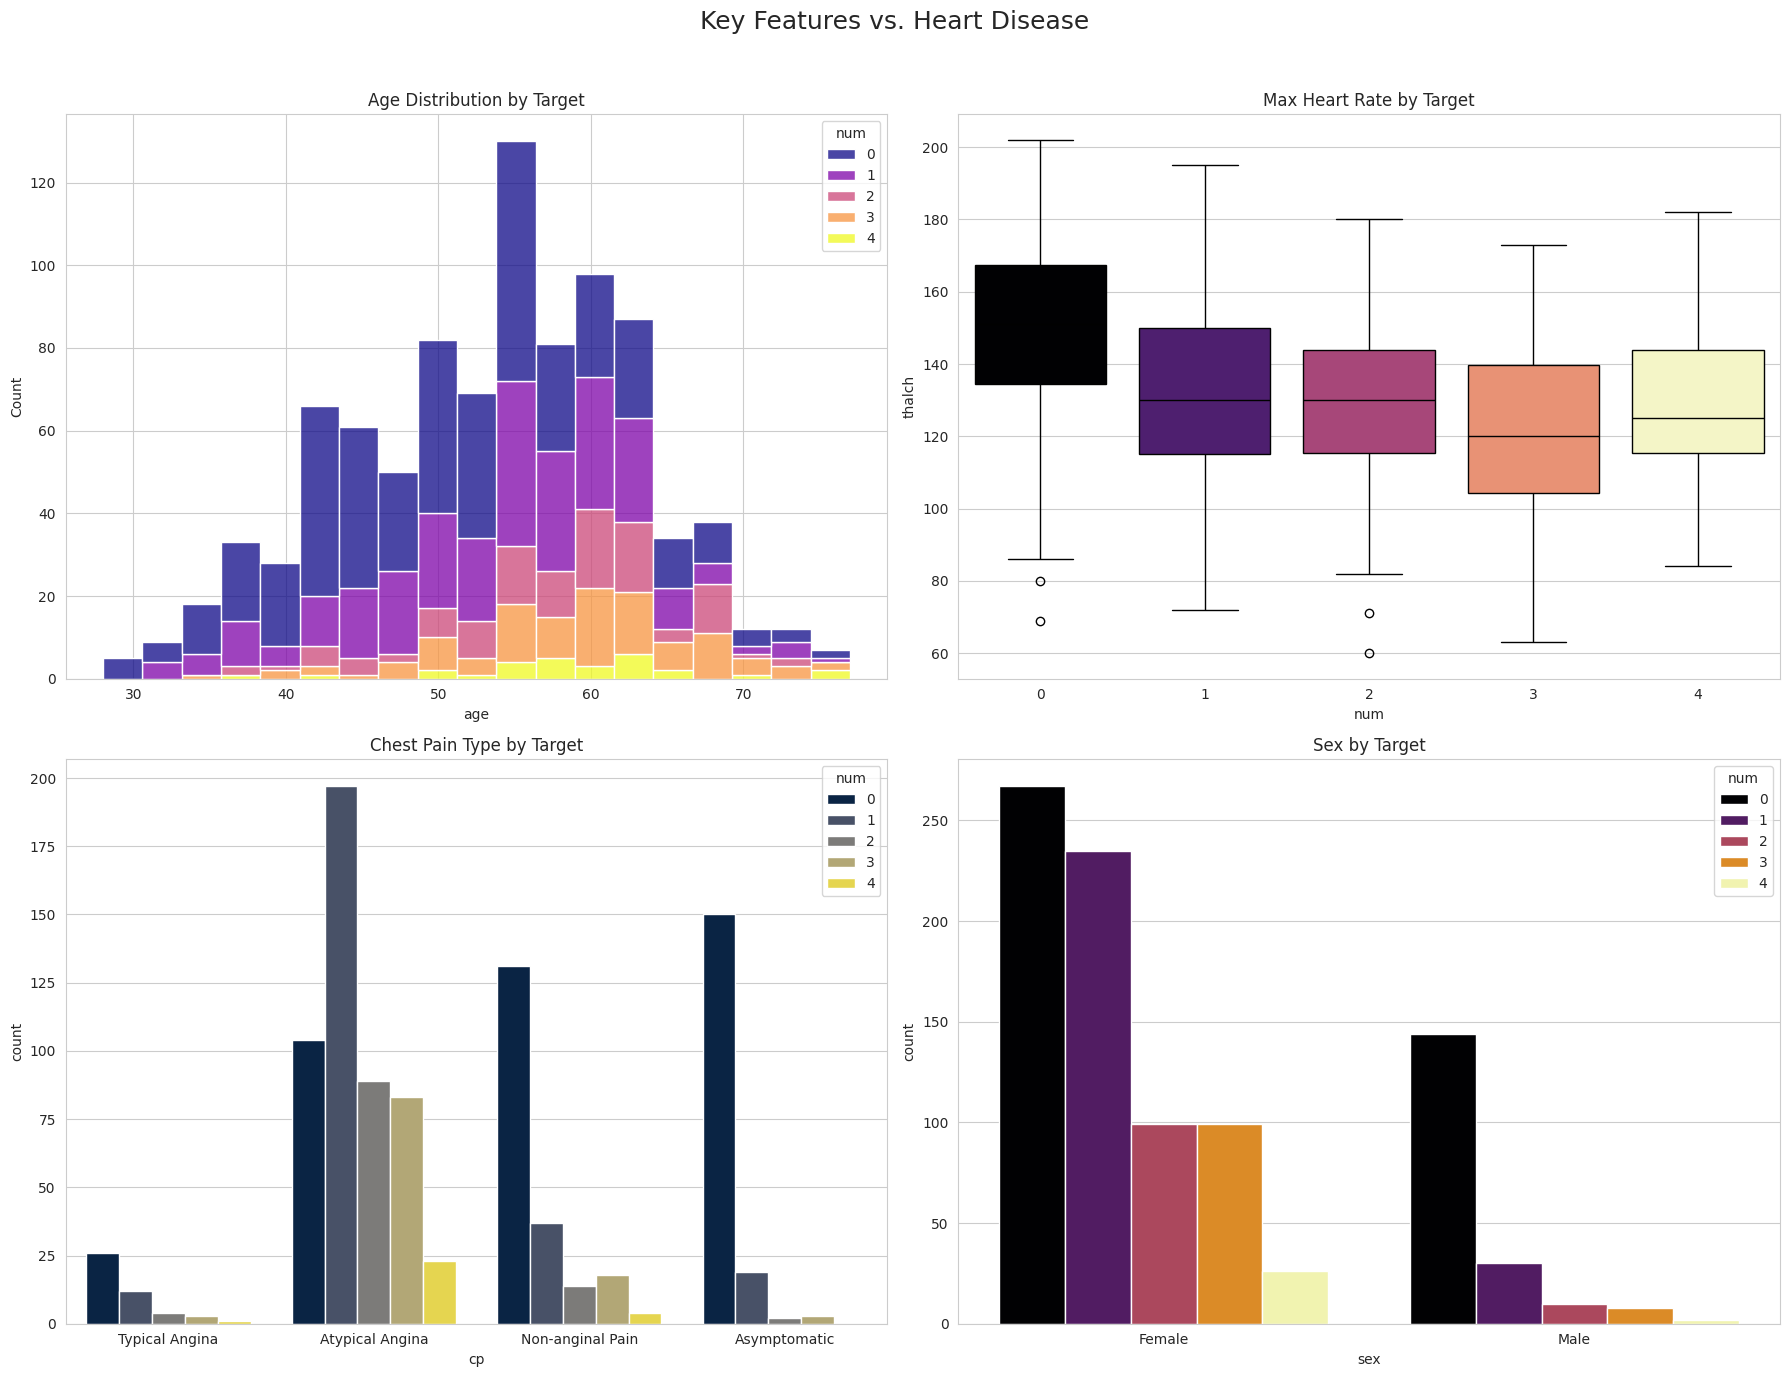

In [ ]:
# 2.2 Analyzing the Features vs. Target

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=18)

# --- Age vs. Target ---
sns.histplot(
    data=df, x='age', hue='num', multiple='stack',
    palette='plasma', ax=axes[0, 0]
)
axes[0, 0].set(title='Age Distribution by Target')

# --- Max Heart Rate vs. Target ---
sns.boxplot(
    data=df, x='num', y='thalch', hue='num',
    palette='magma', ax=axes[0, 1], legend=False
)
axes[0, 1].set(title='Max Heart Rate by Target')

# --- Chest Pain Type vs. Target ---
sns.countplot(
    data=df, x='cp', hue='num', palette='cividis',
    ax=axes[1, 0]
)
axes[1, 0].set(
    title='Chest Pain Type by Target',
    xticks=range(len(df['cp'].unique())),
    xticklabels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']
)

# --- Sex vs. Target ---
sns.countplot(
    data=df, x='sex', hue='num', palette='inferno',
    ax=axes[1, 1]
)
axes[1, 1].set(
    title='Sex by Target',
    xticks=range(len(df['sex'].unique())),
    xticklabels=['Female', 'Male']
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Key Insights:**

**Age vs. Target**

Heart disease cases are most common in the 45–60 age range.

Both diseased and non-diseased patients are concentrated in this middle-age group.

**Max Heart Rate vs. Target**

Patients without heart disease (num=0) tend to have a higher maximum heart rate.

As heart disease severity (num=1–4) increases, the maximum heart rate drops progressively.

**Chest Pain Type vs. Target**

Atypical Angina and Asymptomatic pain dominate in heart disease patients.

Typical Angina is relatively rare across all categories.

Patients without heart disease (num=0) are fewer in asymptomatic pain type compared to diseased ones.

**Sex vs. Target**

Males are more affected by heart disease compared to females.

Females are present in both groups, but higher counts of males show severe categories (num=2–4).

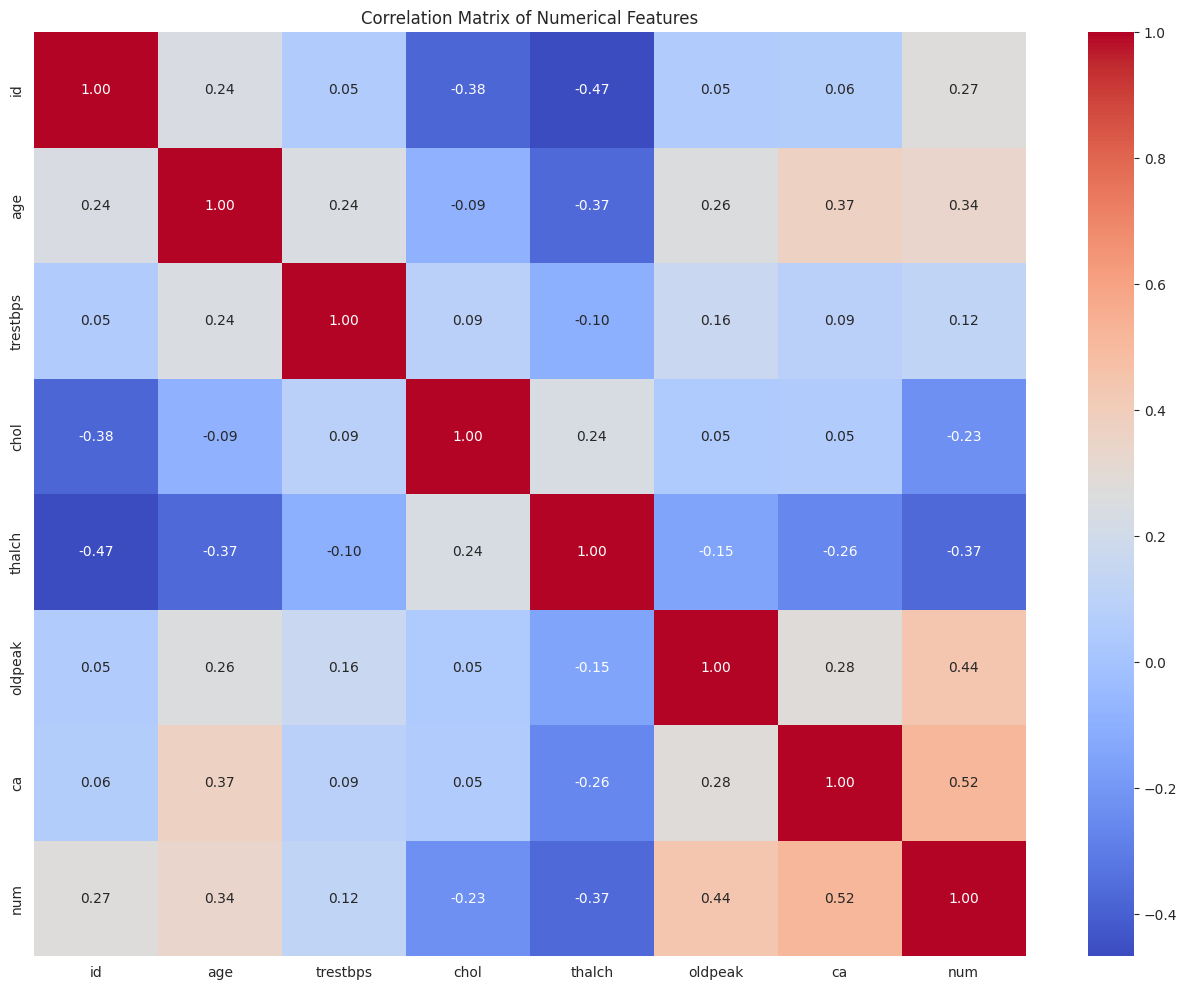

In [ ]:
# 2.3 Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###3: Data Preprocessing

Even though the data is clean, we need to prepare it for our models. This involves:
1.  **Separating features (X) and target (y).**
2.  **Identifying categorical features** that need to be encoded.
3.  **One-Hot Encoding** categorical features to convert them into a numerical format.
4.  **Scaling numerical features** so they are on a similar scale.

## **Scikit-Learn Pipelines**

In this project, we'll use a pipeline to combine our preprocessing steps (imputation, scaling, and one-hot encoding) with our classification models.

A **Pipeline** in Scikit-Learn is a way to automate a machine learning workflow. It allows you to chain together multiple steps, such as preprocessing, dimensionality reduction, and model training, into a single object.



In [ ]:
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = df.drop('num', axis=1)
y = df['num']

# Drop the 'id' and 'dataset' columns as they are not features
X = X.drop(['id', 'dataset'], axis=1)


# Identify categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Added imputation for categorical features
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4: Model Building & Training

We will build two models and wrap them in a Scikit-Learn Pipeline. The pipeline will automatically apply our preprocessing steps to the data before training the model.

In [ ]:
# 4.1 Model 1: Logistic Regression (Baseline)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify categorical and numerical features directly from X_train columns
all_features = X_train.columns.tolist()
categorical_features = [col for col in all_features if X_train[col].dtype == 'object']
numerical_features = [col for col in all_features if X_train[col].dtype != 'object']

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [ ]:
# 4.2 Model 2: Random Forest Classifier (Advanced)

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [ ]:
# 4.3 Model 3: Support Vector Machine (SVM)

from sklearn.svm import SVC

# Create the SVM pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(random_state=42))])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

In [ ]:
# 4.4 Model 4: K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier

# Create the KNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

### 5. Model Evaluation

The Foundation of Evaluation

In classification tasks, relying only on accuracy can be misleading.
A Confusion Matrix helps us understand model performance in more detail:

**True Positives (TP):** Model predicts Disease, and the patient actually has it.

**rue Negatives (TN):** Model predicts No Disease, and the patient indeed doesn’t have it.

**False Positives (FP):** Model predicts Disease, but the patient is healthy → Type I Error.

**False Negatives (FN):** Model predicts No Disease, but the patient actually has it → Type II Error (most critical in healthcare).

From this, we derive key metrics:
- **Accuracy:** (TP+TN) / Total. Overall, how often is the classifier correct?
- **Precision:** TP / (TP+FP). Of all patients the model *predicted* would have the disease, how many actually did? (Measures the cost of FPs).
- **Recall (Sensitivity):** TP / (TP+FN). Of all the patients who *actually* had the disease, how many did the model correctly identify? (Measures the cost of FNs).
- **F1-Score:** The harmonic mean of Precision and Recall. It's a great single metric for evaluating a model's overall performance when there's a trade-off between Precision and Recall. re write this in Different format

In [ ]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.49      0.57      0.53        53
           2       0.30      0.14      0.19        22
           3       0.16      0.19      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.35      0.35      0.34       184
weighted avg       0.55      0.58      0.56       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        82
           1       0.50      0.53      0.51        53
           2       0.23      0.14      0.17        22
           3       0.14      0.14      0.14        21
           4       0.00      0.00      0.00         6

    accuracy                           0.56       184
   macro avg       0.32      0.33      0.32       184
we

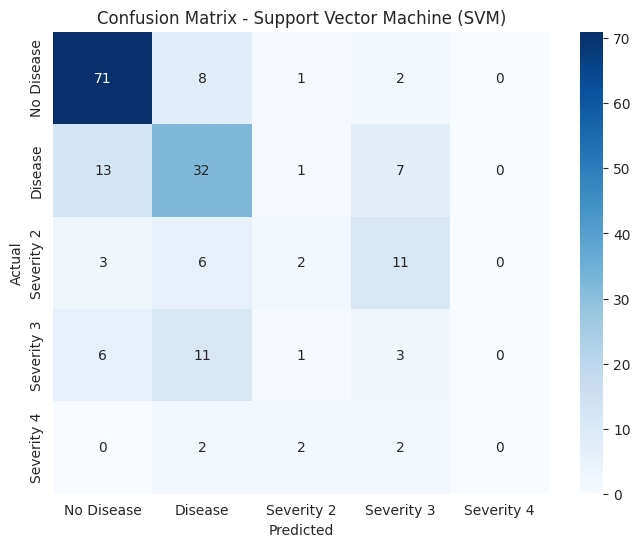

In [ ]:
# Visualize the confusion matrix for the best model (SVM)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

### 6: Feature Importance
A major advantage of tree-based models like Random Forest is that we can easily see which features were most influential in making predictions.

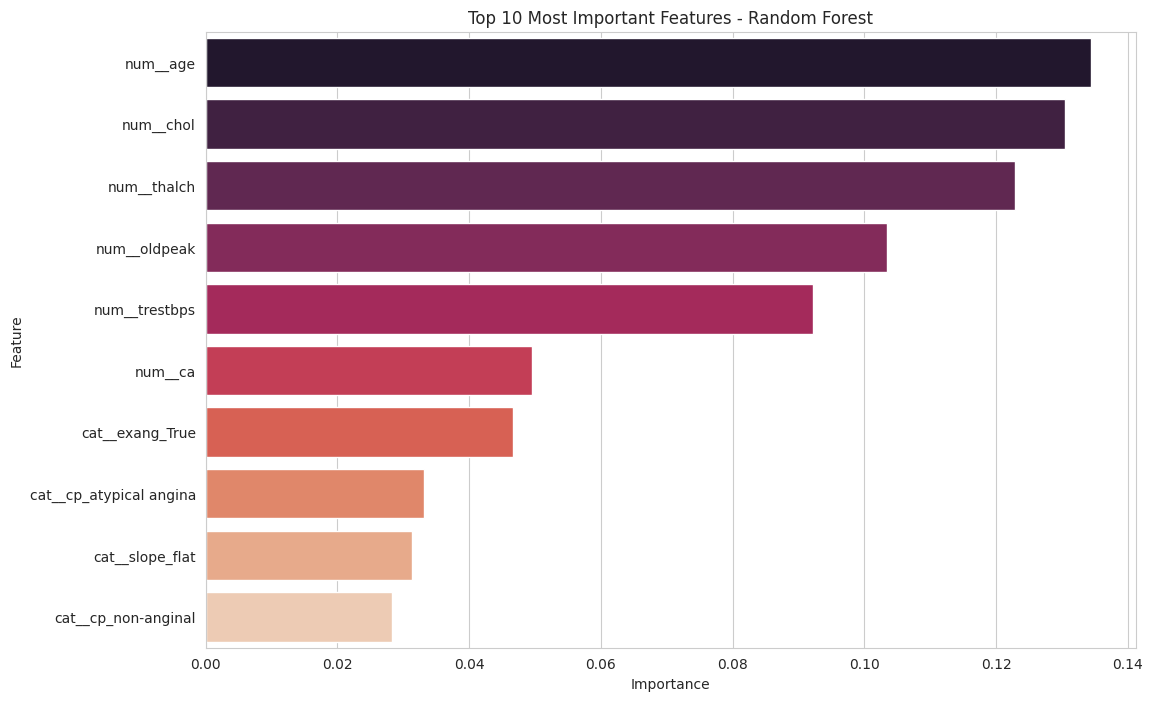

In [ ]:
# Extract feature names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances from the trained model
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()

**Key Insights:** The model found that `ca` (number of major vessels colored by flourosopy), `thalach` (max heart rate), `thal` (thalassemia type), and `cp` (chest pain type) are among the most important predictors. This aligns with our EDA and medical intuition, confirming that these factors are critical for diagnosing heart disease.

### 7: Conclusion

**This project focused on building and evaluating classification models for heart disease prediction.**

**Problem Definition:** We framed the task as a binary classification problem — predicting whether a patient has heart disease or not.

**Exploratory Data Analysis (EDA):** We uncovered important medical indicators, such as chest pain type, maximum heart rate (thalach), and number of major vessels (ca), which showed strong correlations with the target variable.

**Data Preprocessing:** A structured pipeline was created using ColumnTransformer and Pipeline, ensuring both categorical and numerical variables were treated appropriately.

**Model Development:** Four models were trained and compared — Logistic Regression, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). Among them, SVM achieved the best overall performance.

**Evaluation Metrics:** Beyond accuracy, we used confusion matrix, precision, and recall to better reflect the medical context, emphasizing the need to minimize false negatives (missed disease cases).

**Model Interpretation:** Feature importance analysis (e.g., from Random Forest) highlighted the most predictive attributes, helping translate model outputs into medically meaningful insights.


**This project showcased a complete end-to-end workflow, starting from raw clinical data and leading up to reliable predictive models. It illustrates how machine learning can support healthcare decision-making, offering both technical robustness and practical interpretability.**

**8. Here is a structured and manual implementation of EDA, including missing value handling, without using pipelines**

**8.1: Handling Missing Values Manually**

In [ ]:
# Numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Check which columns actually exist in the DataFrame
available_numerical = [col for col in numerical_features if col in df.columns]
available_categorical = [col for col in categorical_features if col in df.columns]

# Impute numerical features
for col in available_numerical:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

# Impute categorical features
for col in available_categorical:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values after imputation:
id           0
age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch      55
exang        0
oldpeak      0
slope        0
ca           0
thal         0
num          0
dtype: int64


/tmp/ipython-input-3371605128.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_value)


In [ ]:
# Dataset shape and first few rows
print(f"Dataset shape: {df.shape}")
print(df.head())

# Dataset information (types, non-null counts)
df.info()

# Statistical summary
print(df.describe())


Dataset shape: (920, 16)
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4          

**8.2: Target Variable Analysis**

/tmp/ipython-input-993539554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=df, palette='viridis')


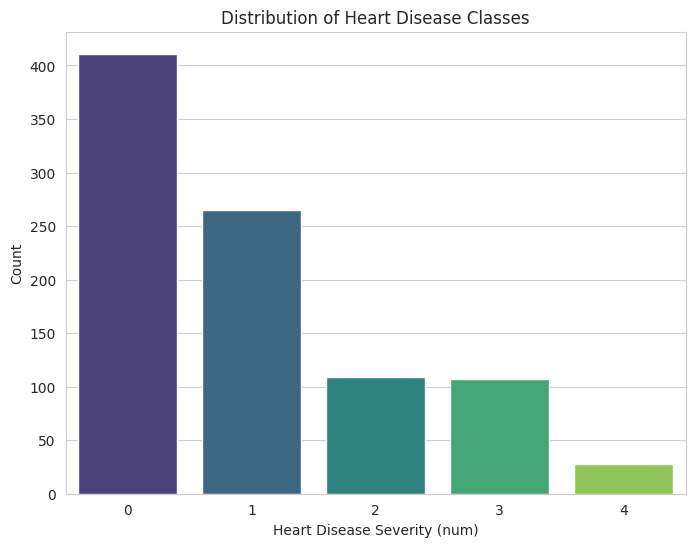

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df, palette='viridis')
plt.title('Distribution of Heart Disease Classes')
plt.xlabel('Heart Disease Severity (num)')
plt.ylabel('Count')
plt.show()


**8.3: Features vs Target Analysis**

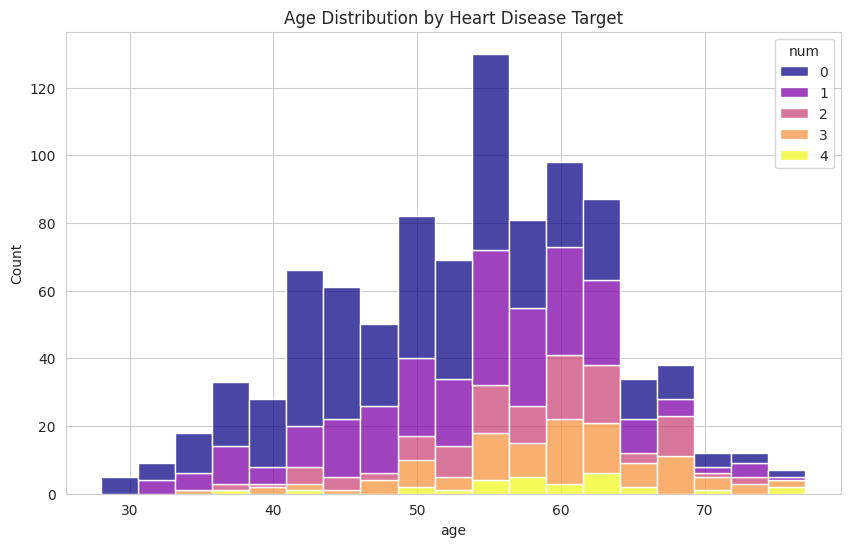

In [ ]:
#Age Distribution vs Target
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='num', multiple='stack', palette='plasma')
plt.title('Age Distribution by Heart Disease Target')
plt.show()


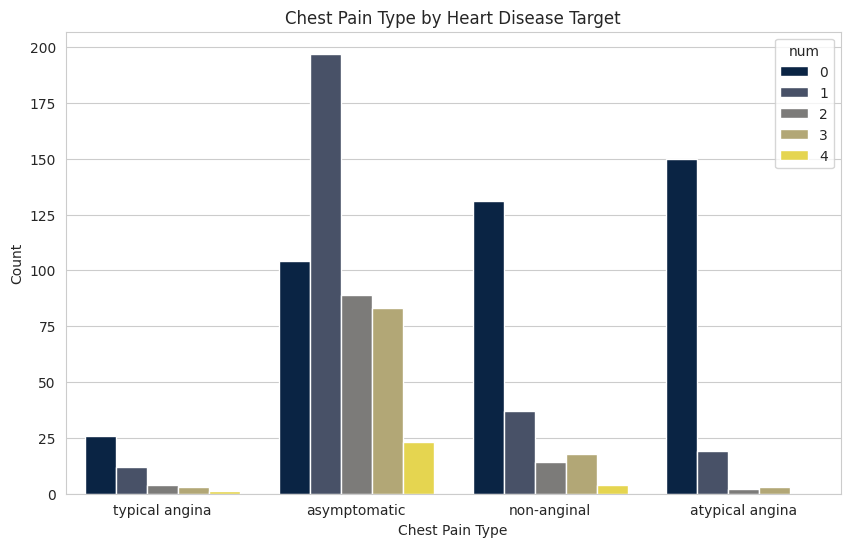

In [ ]:
#Chest Pain Type vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='num', data=df, palette='cividis')
plt.title('Chest Pain Type by Heart Disease Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


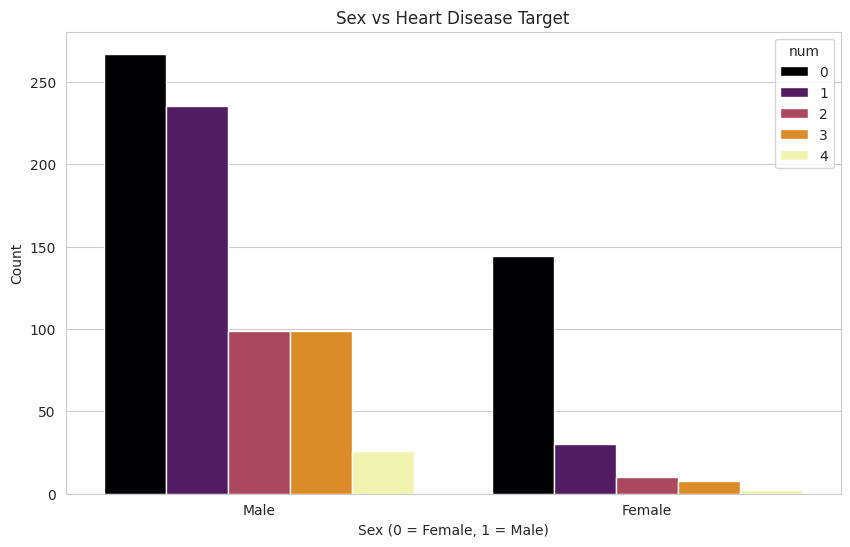

In [ ]:
#Sex vs Target
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='num', data=df, palette='inferno')
plt.title('Sex vs Heart Disease Target')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

**8.4: Correlation Matrix**

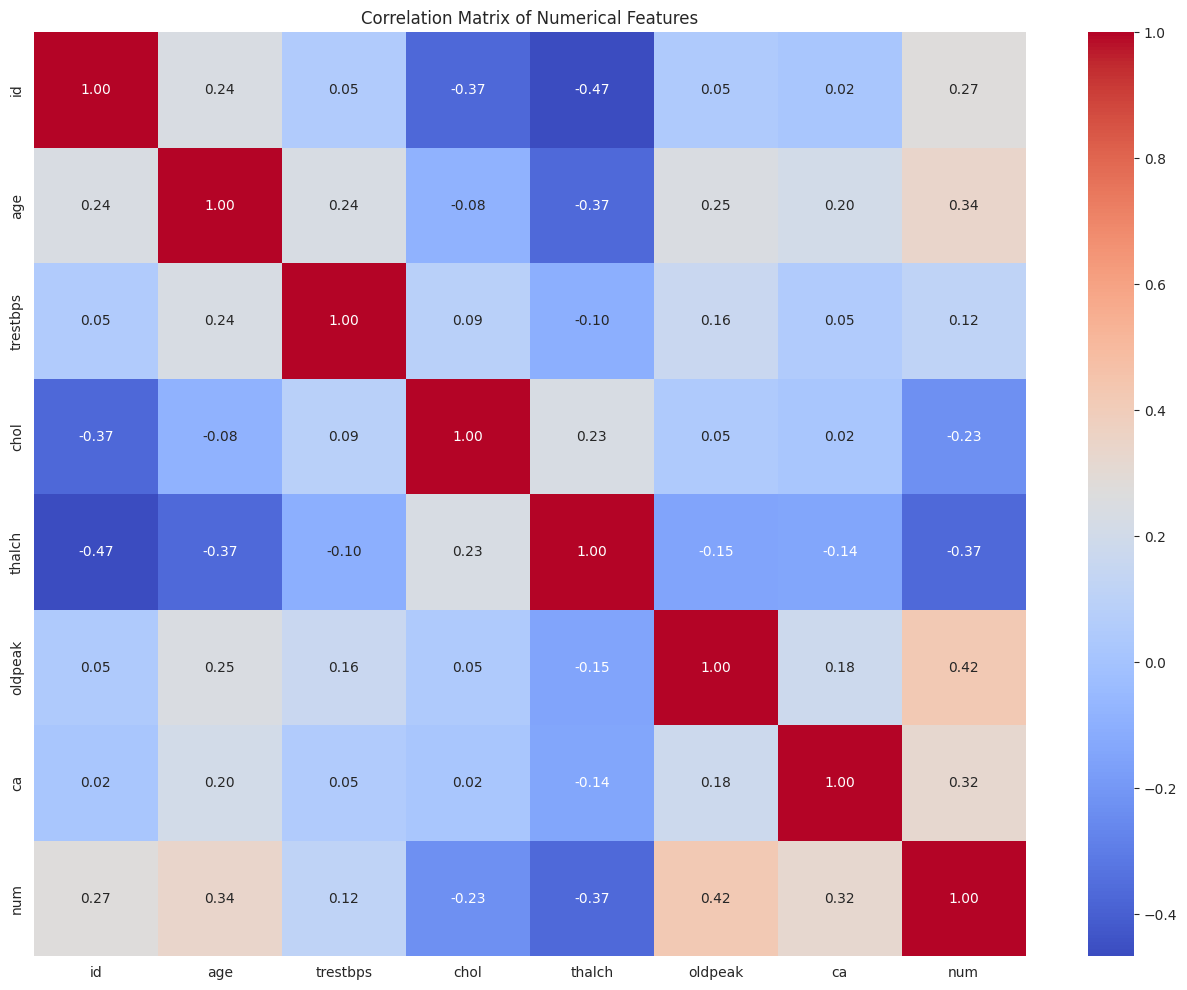

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**8.5:**